## TASK 1: THIẾT LẬP MÔI TRƯỜNG, LOAD VÀ IMPORT DATAFRAME

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
df = pd.DataFrame()
df = pd.read_csv('12thg.csv')

In [120]:
path = '/baibcpy/DA_Python/revenue2024/'
dataframe = pd.read_csv(path+'clothing_orders_month_1.csv')
dataframe.head()

,Order ID,Product,Quantity,Price Each,Order Date,Branch
0,27591,Jacket,3,$40.85,2024-01-12,Binh Tan
1,27893,Skirt,5,$41.10,2024-01-27,Phu Nhuan
2,27893,Sweater,1,$20.98,2024-01-27,Binh Tan
3,13265,T-Shirt,3,$49.46,2024-01-19,Thu Duc
4,13265,Sneakers,2,$34.86,2024-01-19,Binh Tan


## TASK 2: LÀM SẠCH VÀ CHUẨN HÓA DATA

### task 2.1 : Hợp nhất dữ liệu 12 tháng

In [124]:
path = '/baibcpy/DA_Python/revenue2024/'

frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)

result.to_csv('12thg.csv', index=False)


### task 2.2 : tạo thêm cột tháng

In [2]:
df['Month'] = df['Order Date'].str[5:7]
df.head(20)

,Order ID,Product,Quantity,Price Each,Order Date,Branch,Month
0,27591,Jacket,3,$40.85,2024-01-12,Binh Tan,01
1,27893,Skirt,5,$41.10,2024-01-27,Phu Nhuan,01
2,27893,Sweater,1,$20.98,2024-01-27,Binh Tan,01
3,13265,T-Shirt,3,$49.46,2024-01-19,Thu Duc,01
4,13265,Sneakers,2,$34.86,2024-01-19,Binh Tan,01
5,11486,Jacket,1,$36.34,2024-01-18,District 10,01
6,29090,Blazer,2,$30.60,2024-01-27,Go Vap,01
7,29090,Shorts,1,$22.89,2024-01-27,Phu Nhuan,01
8,13066,T-Shirt,3,$18.64,2024-01-5,District 5,01
9,13066,Skirt,1,$46.23,2024-01-5,Go Vap,01


### task 2.3 : chuẩn hóa định dạng ngày, tên sản phẩm

In [ ]:
# 2. Chuẩn hóa định dạng ngày
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])  # Loại bỏ dòng có lỗi ngày tháng
# 4. Chuẩn hóa tên sản phẩm
df['Product'] = df['Product'].str.strip().str.lower()


### task 2.4 : định dạng cột doanh thu và số lượng

In [32]:
 # 6. Định dạng cột doanh thu và số lượng
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0).astype(int)
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce').fillna(0).astype(float)

### TASK 3: PHÂN TÍCH VÀ TRỰC QUAN

### có bao nhiêu sản phẩm trong cửa hàng


In [6]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("12thg.csv")

# Đếm số lượng sản phẩm duy nhất trong cửa hàng
num_products = df["Product"].nunique()

print(f"Số lượng sản phẩm trong cửa hàng: {num_products}")

Số lượng sản phẩm trong cửa hàng: 10


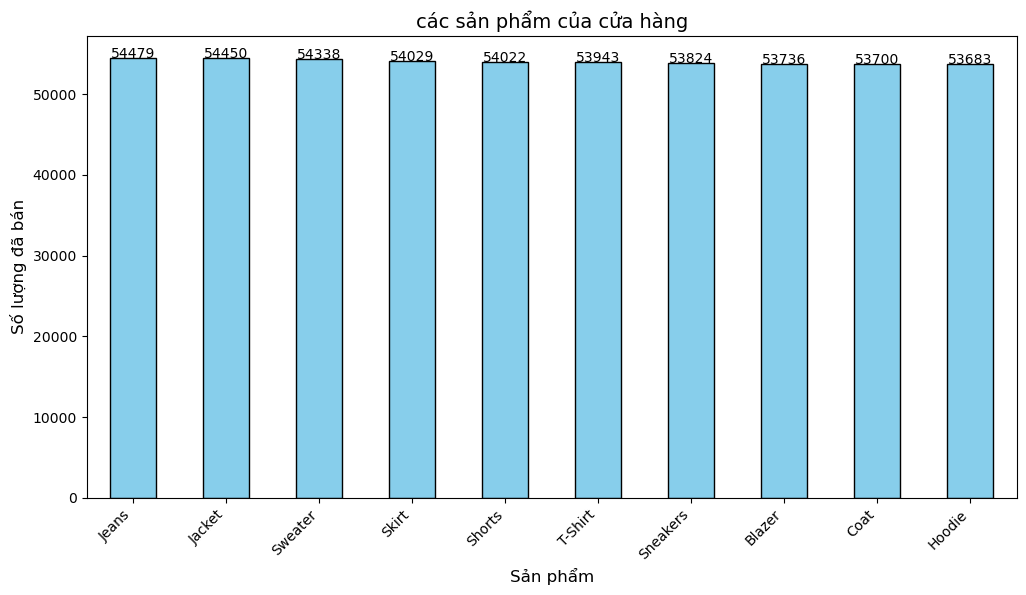

In [10]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("12thg.csv")

# Nhóm dữ liệu theo sản phẩm và tính tổng số lượng đã bán
product_sales = df.groupby("Product")["Quantity"].sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
product_sales.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")

# Thêm tiêu đề và nhãn
plt.title("các sản phẩm của cửa hàng", fontsize=14)
plt.xlabel("Sản phẩm", fontsize=12)
plt.ylabel("Số lượng đã bán", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Hiển thị giá trị trên các cột
for i, value in enumerate(product_sales.sort_values(ascending=False)):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10)

# Hiển thị biểu đồ
plt.show()

### tổng doanh thu là bao nhiêu ? (tháng, năm)